# Load Data

In [10]:
import pandas as pd

df = pd.read_csv("../data/processed/preprocessed_reviews.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (10381, 37)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,ngram_really like app,ngram_app easy use,ngram_buy pro version,ngram_using app years,ngram_paid pro version,ngram_really good app,ngram_simple easy use,ngram_used app years,ngram_sync google calendar,ngram_todo list app
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,...,0,0,0,0,0,0,0,0,0,0
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,...,0,0,0,0,0,0,0,0,0,0
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print("\nColumns:", df.columns.tolist())
df.info()
print("\nMissing values:")
print(df.isnull().sum())


Columns: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'appId', 'sentiment_binary', 'cleaned_text', 'review_length', 'exclamation_count', 'question_count', 'ngram_great app', 'ngram_good app', 'ngram_easy use', 'ngram_love app', 'ngram_pro version', 'ngram_google calendar', 'ngram_free version', 'ngram_use app', 'ngram_like app', 'ngram_doesnt work', 'ngram_really like app', 'ngram_app easy use', 'ngram_buy pro version', 'ngram_using app years', 'ngram_paid pro version', 'ngram_really good app', 'ngram_simple easy use', 'ngram_used app years', 'ngram_sync google calendar', 'ngram_todo list app']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381 entries, 0 to 10380
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   reviewId                    10381 non-null  object 
 1   userName  

# Sentiment Distribution


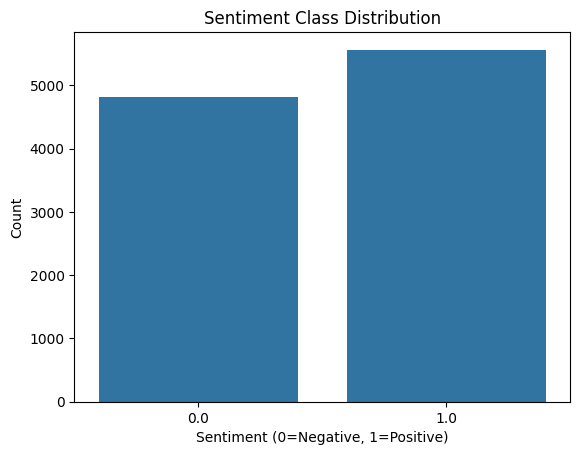

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_binary', data=df)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

# Review Length Distribution


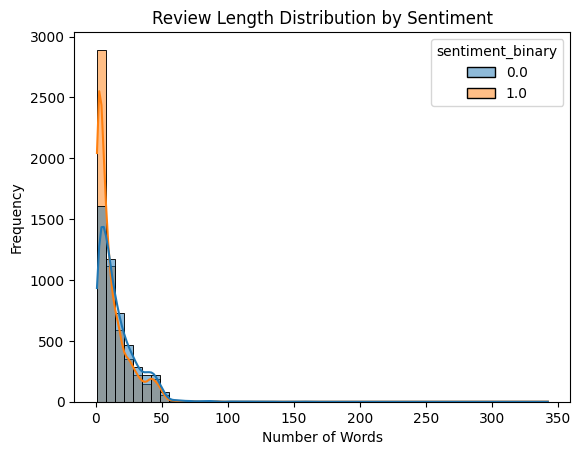

In [14]:
sns.histplot(data=df, x='review_length', hue='sentiment_binary', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Boxplots for Text Features


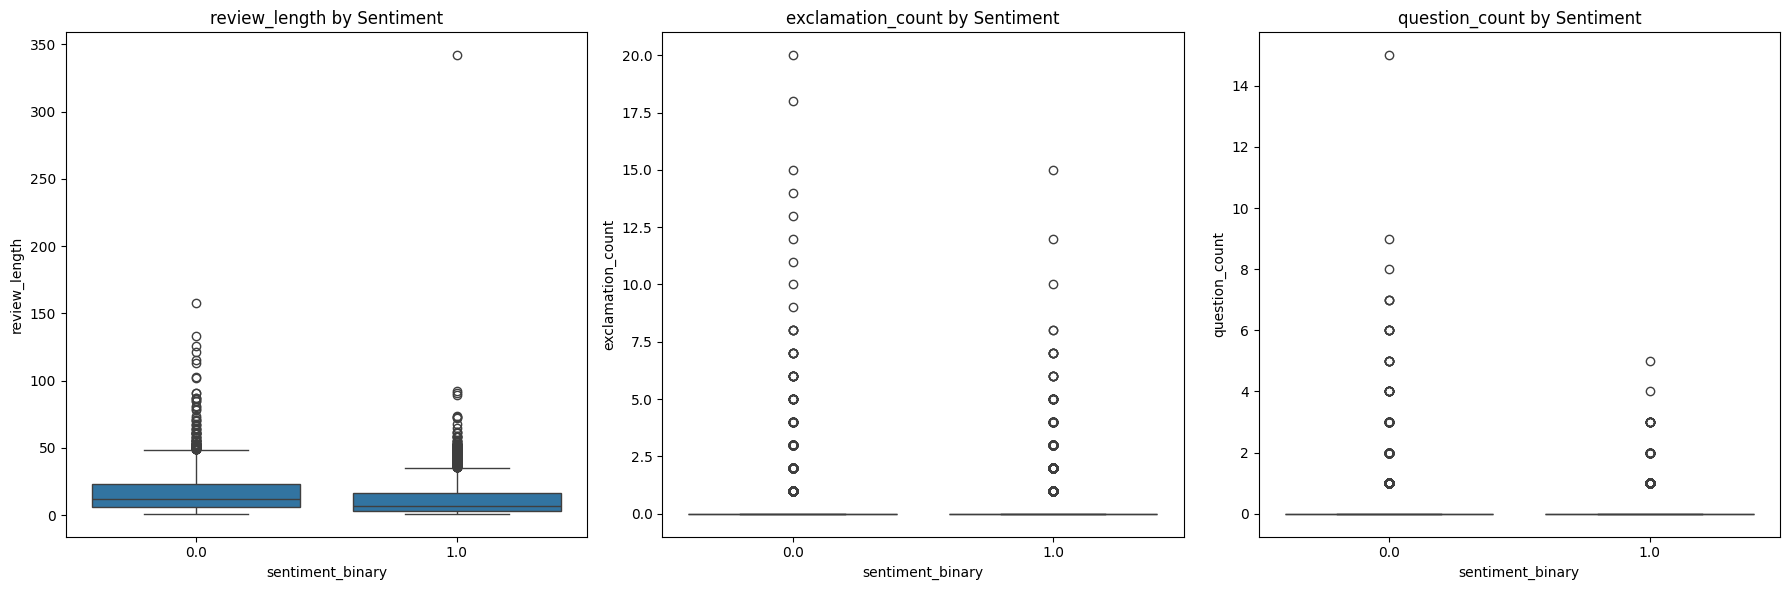

In [17]:
features = ['review_length', 'exclamation_count', 'question_count']
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 6))
if len(features) == 1:
    axes = [axes]  # ensure axes is iterable
for i, feat in enumerate(features):
    sns.boxplot(x='sentiment_binary', y=feat, data=df, ax=axes[i])
    axes[i].set_title(f'{feat} by Sentiment')
plt.tight_layout()
plt.show()

# Correlation Heatmap


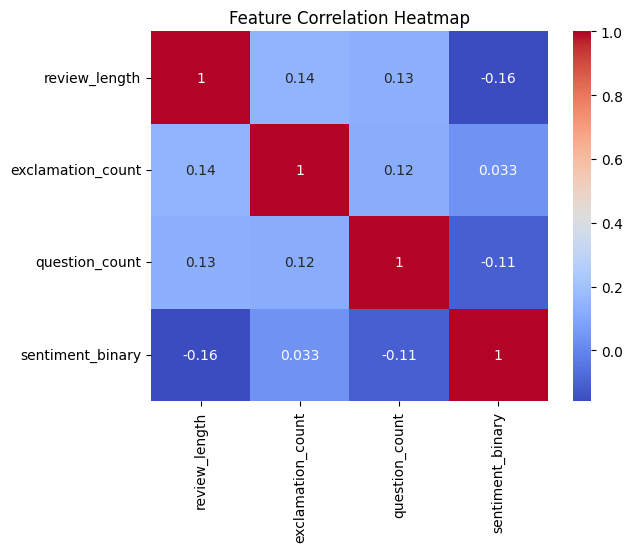

In [18]:
import numpy as np

corr_features = features + ['sentiment_binary']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Word Clouds

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = nltk.word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
        return ' '.join(tokens)
    return ''

if 'cleaned_text' not in df.columns:
    df['cleaned_text'] = df['content'].apply(preprocess_text)

pos_text = ' '.join(df[df['sentiment_binary'] == 1]['cleaned_text'])
neg_text = ' '.join(df[df['sentiment_binary'] == 0]['cleaned_text'])

WordCloud(background_color='white').generate(pos_text).to_image().show()
WordCloud(background_color='white').generate(neg_text).to_image().show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nissidom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nissidom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nissidom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Top Words by Sentiment


Top bigrams: [('great app', np.int64(444)), ('good app', np.int64(295)), ('easy use', np.int64(291)), ('love app', np.int64(286)), ('pro version', np.int64(212)), ('google calendar', np.int64(205)), ('free version', np.int64(189)), ('use app', np.int64(156)), ('like app', np.int64(153)), ('doesnt work', np.int64(151))]
Top trigrams: [('really like app', np.int64(41)), ('app easy use', np.int64(33)), ('buy pro version', np.int64(29)), ('using app years', np.int64(29)), ('paid pro version', np.int64(22)), ('really good app', np.int64(22)), ('simple easy use', np.int64(22)), ('used app years', np.int64(21)), ('sync google calendar', np.int64(20)), ('todo list app', np.int64(20))]


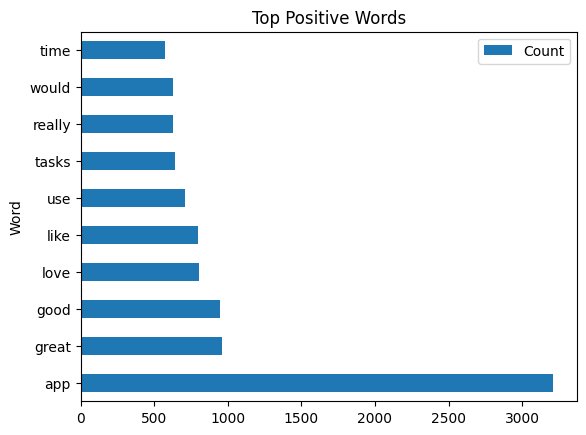

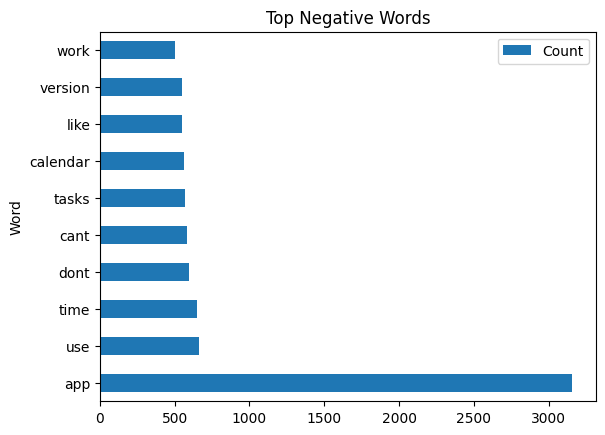

In [21]:
from collections import Counter

def get_top_words(texts, n=10):
    words = ' '.join(texts).split()
    return Counter(words).most_common(n)

top_pos = get_top_words(df[df['sentiment_binary'] == 1]['cleaned_text'])
top_neg = get_top_words(df[df['sentiment_binary'] == 0]['cleaned_text'])

pd.DataFrame(top_pos, columns=['Word', 'Count']).plot(kind='barh', x='Word', title='Top Positive Words')
pd.DataFrame(top_neg, columns=['Word', 'Count']).plot(kind='barh', x='Word', title='Top Negative Words')


# CELL 9: Top Bigrams and Trigrams as Summary (Optional)
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    return sorted(zip(vocab, counts), key=lambda x: x[1], reverse=True)[:top_k]

print("Top bigrams:", get_top_ngrams(df['cleaned_text'], 2))
print("Top trigrams:", get_top_ngrams(df['cleaned_text'], 3))

# Feature Importance with Logistic Regression


<Axes: title={'center': 'Top Predictive Words'}, ylabel='Word'>

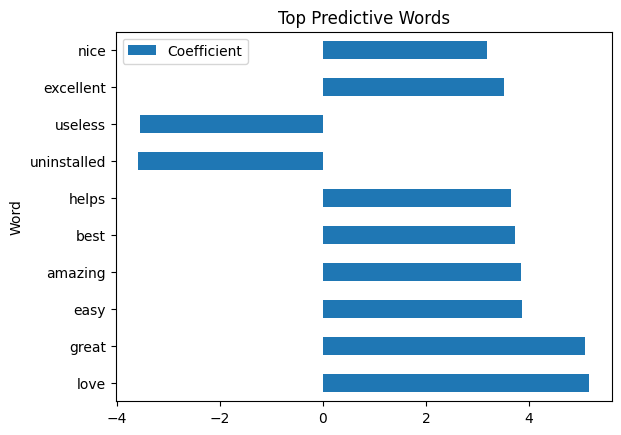

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)),
    ('clf', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment_binary'], test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
coefficients = pipeline.named_steps['clf'].coef_[0]
coef_df = pd.DataFrame({'Word': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plot top 10 positive/negative features
coef_df.head(10).plot(kind='barh', x='Word', title='Top Predictive Words')
